In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
county ="miami_dade"
county_csv=pd.read_csv(f"Housing Loss Data///{county}_fl_processed_2017_to_2019_20210916.csv")

In [4]:
county_csv.head()

,census_tract_GEOID,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,median-property-value,median-monthly-housing-cost,pct-white,...,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12086000211,931,369,562,352,1592,53533,240400,1728,710,...,0.355872,2.529359,0.650786,1.733086,2.034212,0.636364,1.130385,12086,Miami-Dade County,Florida
1,12086000212,1668,1373,295,201,1109,33958,179900,1389,887,...,1.016949,3.641661,1.068455,2.495222,3.494282,0.909091,1.941727,12086,Miami-Dade County,Florida
2,12086000213,1379,694,685,356,1291,40250,254900,1701,696,...,0.437956,1.585014,1.367382,1.086033,2.126984,0.492537,1.181937,12086,Miami-Dade County,Florida
3,12086000214,2238,1209,1029,649,1135,39962,147800,1299,1362,...,0.194363,1.681831,0.750059,1.152370,1.704342,0.642105,0.947080,12086,Miami-Dade County,Florida
4,12086000128,1364,726,638,396,1349,63889,205900,1610,1240,...,0.156740,0.459137,0.831560,0.314595,0.980392,0.303030,0.544791,12086,Miami-Dade County,Florida


In [5]:
county_csv.columns


Index(['census_tract_GEOID', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-evictions', 'total-foreclosure-sales',
       'avg-foreclosure-sales', 

In [15]:
florida = gpd.read_file(f"C://Users//Kavita//Documents//DataDive Sep 2021//Housing Loss Data//{county}_fl_2010_tracts_formatted.geojson")

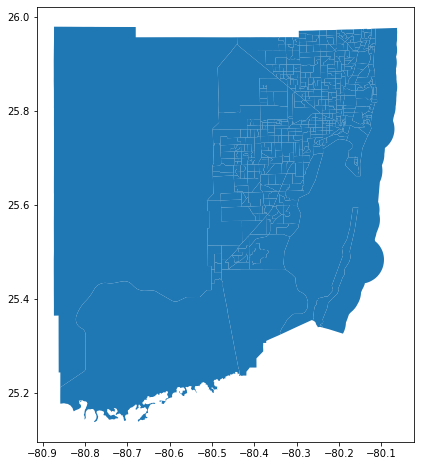

In [16]:
florida.plot(figsize =(12,8));

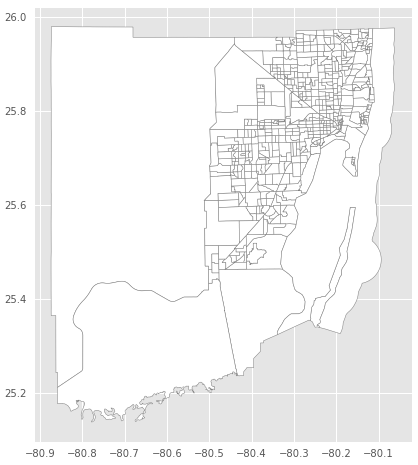

In [7]:
with plt.style.context(("seaborn","ggplot")):
    florida.plot(figsize=(12,8),color="white", edgecolor="grey")

In [17]:
florida.head()

,census_tract_GEOID,geometry
0,12086008306,"POLYGON ((-80.36583 25.62142, -80.36587 25.620..."
1,12086008601,"POLYGON ((-80.35977 25.73252, -80.35974 25.732..."
2,12086008602,"POLYGON ((-80.38287 25.71492, -80.38279 25.712..."
3,12086010005,"POLYGON ((-80.29386 25.93929, -80.29385 25.939..."
4,12086010009,"POLYGON ((-80.27845 25.96218, -80.27842 25.961..."


In [18]:
county_csv['census_tract_GEOID_int'] =county_csv['census_tract_GEOID'].astype(dtype='int64')

In [19]:
florida['census_tract_GEOID_int'] = florida['census_tract_GEOID'].astype(dtype='int64')

In [20]:
florida_final = florida.merge(county_csv, on="census_tract_GEOID_int", how="left")

In [21]:
print("type of DataFrame :", type(florida_final))

type of DataFrame : <class 'geopandas.geodataframe.GeoDataFrame'>


In [22]:
florida_final.head(1)

,census_tract_GEOID_x,geometry,census_tract_GEOID_int,census_tract_GEOID_y,total-households,total-renter-occupied-households,total-owner-occupied-households,total-owner-occupied-households-mortgage,median-gross-rent,median-household-income,...,lien-foreclosure-rate-2019,avg-eviction-rate,ratio-to-mean-foreclosure-rate,ratio-to-mean-eviction-rate,avg-housing-loss-rate,evictions-pct-total-housing-loss,housing-loss-index,county_GEOID,county,state
0,12086008306,"POLYGON ((-80.36583 25.62142, -80.36587 25.620...",12086008306,12086008306,2153,548,1605,1247,1445,63561,...,0.062305,0.851582,0.505181,0.583493,1.077066,0.241379,0.598511,12086,Miami-Dade County,Florida


In [46]:
florida_final.columns

Index(['census_tract_GEOID_x', 'geometry', 'census_tract_GEOID_int',
       'census_tract_GEOID_y', 'total-households',
       'total-renter-occupied-households', 'total-owner-occupied-households',
       'total-owner-occupied-households-mortgage', 'median-gross-rent',
       'median-household-income', 'median-property-value',
       'median-monthly-housing-cost', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-indian', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'pct-below-poverty-level', 'households-children',
       'single-parent-household', 'older-adult-alone', 'level-of-education',
       'immigrant-status', 'english-fluency', 'drive-to-work',
       'public-transport-to-work', 'vacant-properties', 'live-in-mobile-home',
       'pct-renter-occupied', 'pct-owner-occupied',
       'pct-owner-occupied-mortgage', 'pct-owner-occupied-without-mortgage',
       'median-house-age', 'pct-non-white', 'pct-without-health-insurance',
       'total-evictions', 'avg-

Text(0.5, 1.0, 'eviction filing 2019')

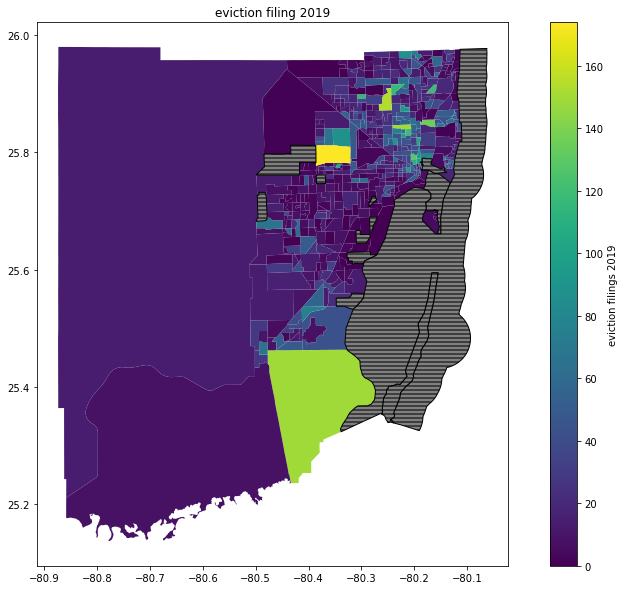

In [25]:
florida_final.plot("eviction-filings-2019", figsize=(15,10), legend =True, 
                   legend_kwds={"label": "eviction filings 2019"},
                   missing_kwds={ "color":"grey",
                                 "edgecolor":"black",
                                 "hatch":"---",
                                 "label":"Missing Values"
                                 })
plt.title("eviction filing 2019")

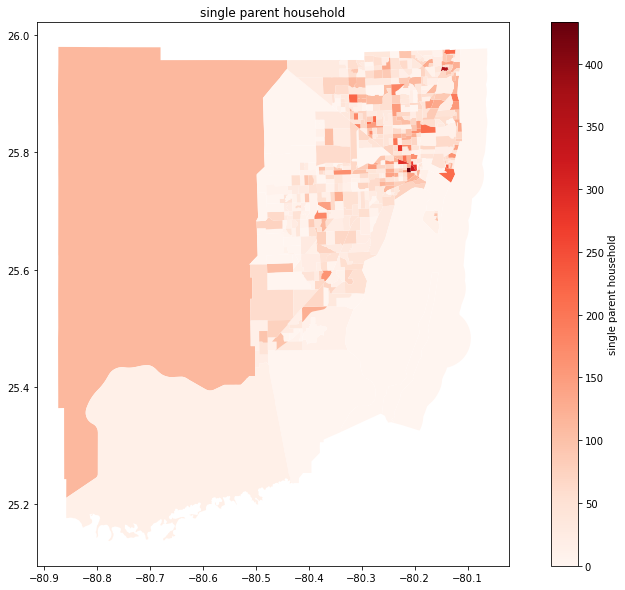

In [26]:
column ="single-parent-household"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                  cmap =plt.cm.Reds, missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

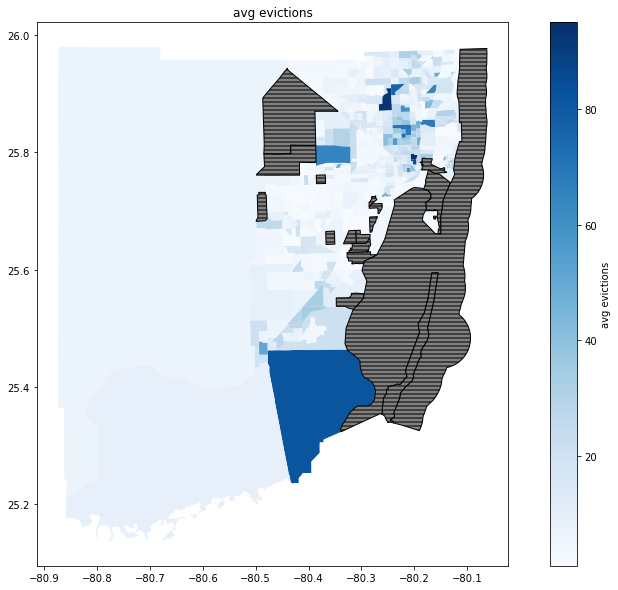

In [27]:
column ="avg-evictions"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                  cmap =plt.cm.Blues, missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

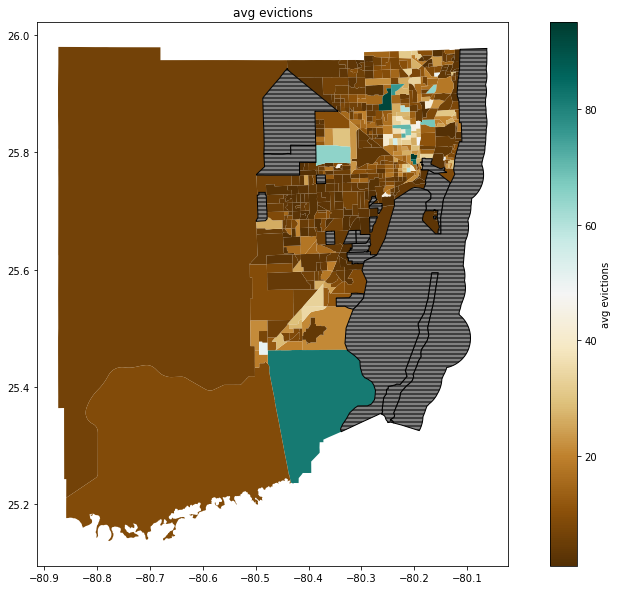

In [28]:
column ="avg-evictions"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                  cmap =plt.cm.BrBG, missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

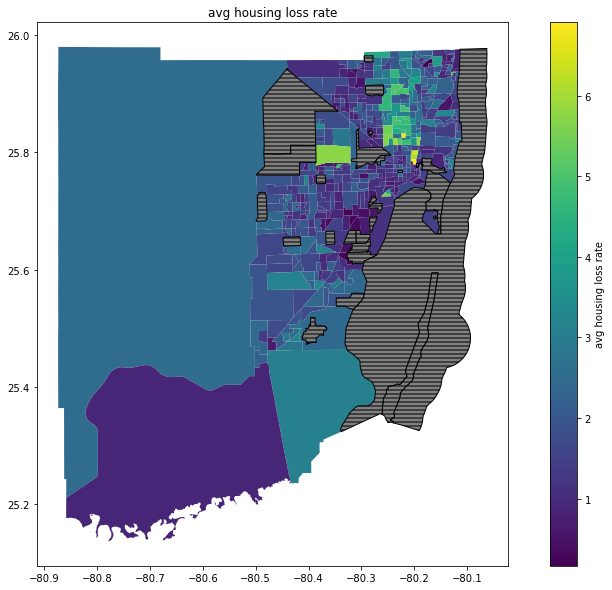

In [29]:
column ="avg-housing-loss-rate"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                                   missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

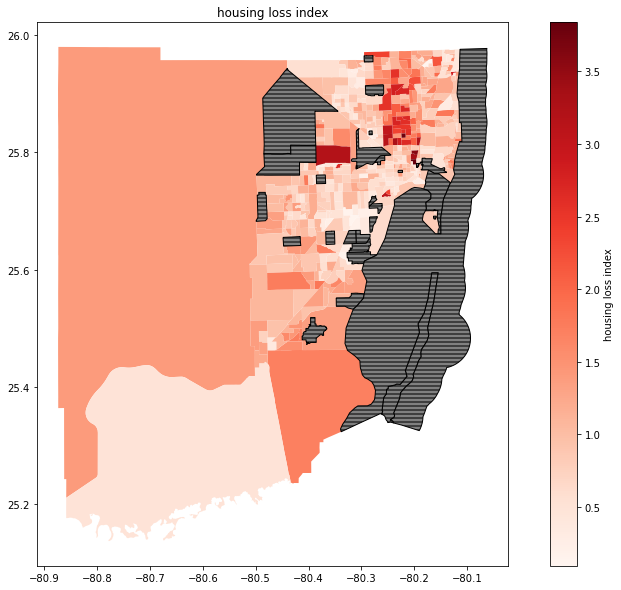

In [30]:
column ="housing-loss-index"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                                   cmap=plt.cm.Reds,
                                   missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

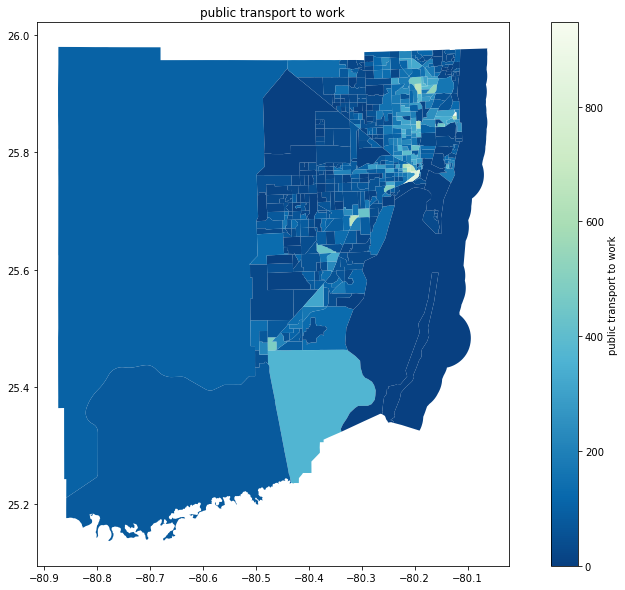

In [31]:
column ="public-transport-to-work"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                                   cmap=plt.cm.GnBu_r,
                                   missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

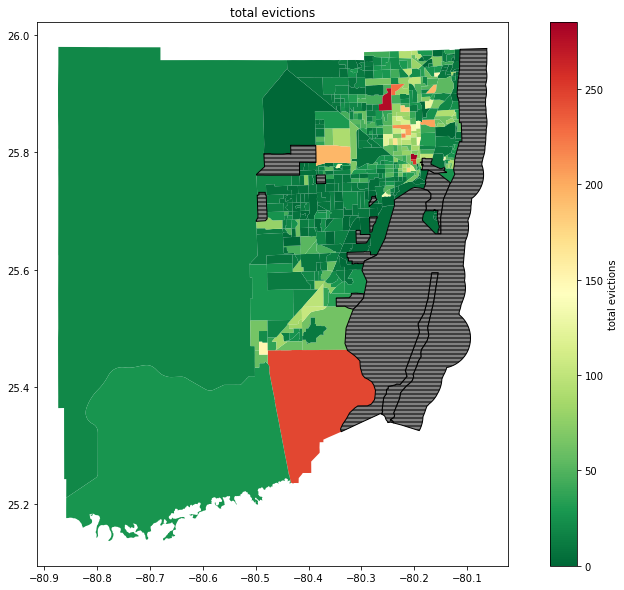

In [32]:
column ="total-evictions"

florida_final.plot(column, figsize=(15,10), legend=True, legend_kwds={"label":column.replace("-"," ")},
                                   cmap=plt.cm.RdYlGn_r,
                                   missing_kwds ={"color":"grey",
                                                   "edgecolor":"black",
                                                   "hatch":"---",
                                                   "label":"Missing Values"})
plt.title(column.replace("-"," "));

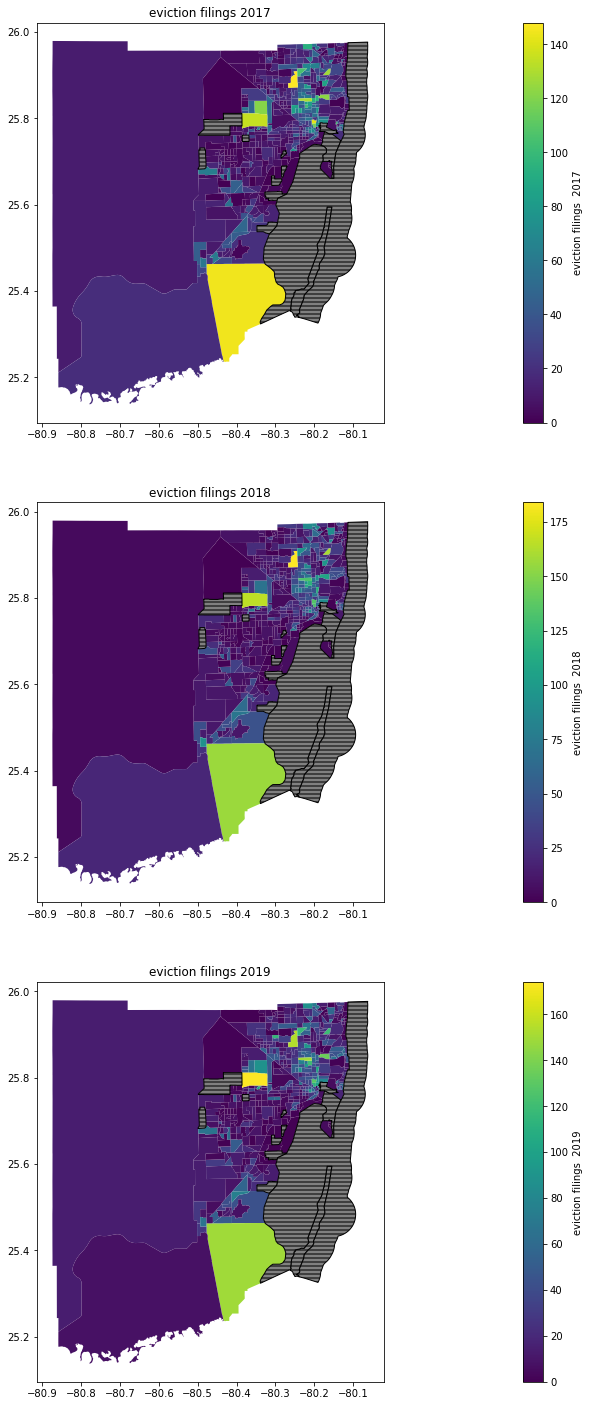

In [33]:
# multi year
column_suffix ="eviction-filings-"

year=2017

plt.figure(figsize=(50,25))
ax1=plt.subplot(311)
florida_final.plot(column_suffix+str(year), figsize=(15,10), legend =True,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year)},
                  ax=ax1,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year));


ax2=plt.subplot(312)
florida_final.plot(column_suffix+str(year+1), figsize=(15,10), legend =True,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+1)},
                  ax=ax2,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+1));


ax3=plt.subplot(313)
florida_final.plot(column_suffix+str(year+2), figsize=(15,10), legend =True,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+2)},
                  ax=ax3,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+2));


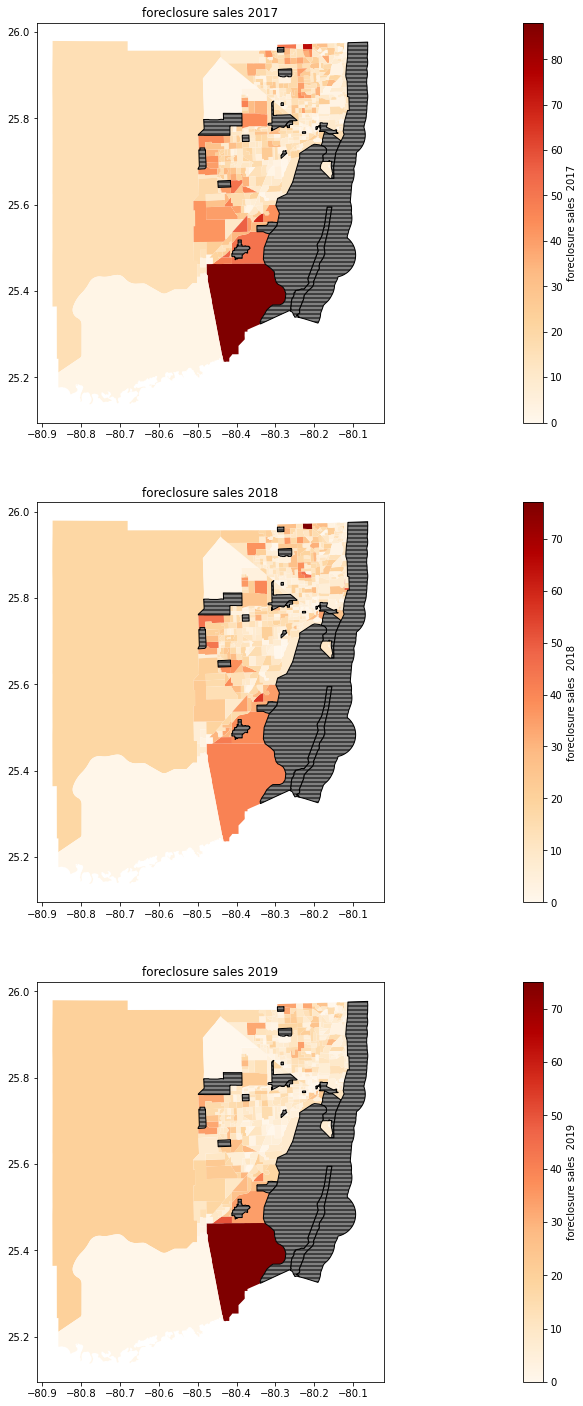

In [34]:
# multi year
column_suffix ="foreclosure-sales-"

year=2017

plt.figure(figsize=(50,25))
ax1=plt.subplot(311)
florida_final.plot(column_suffix+str(year), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year)},
                  ax=ax1,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year));


ax2=plt.subplot(312)
florida_final.plot(column_suffix+str(year+1), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+1)},
                  ax=ax2,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+1));


ax3=plt.subplot(313)
florida_final.plot(column_suffix+str(year+2), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+2)},
                  ax=ax3,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+2));


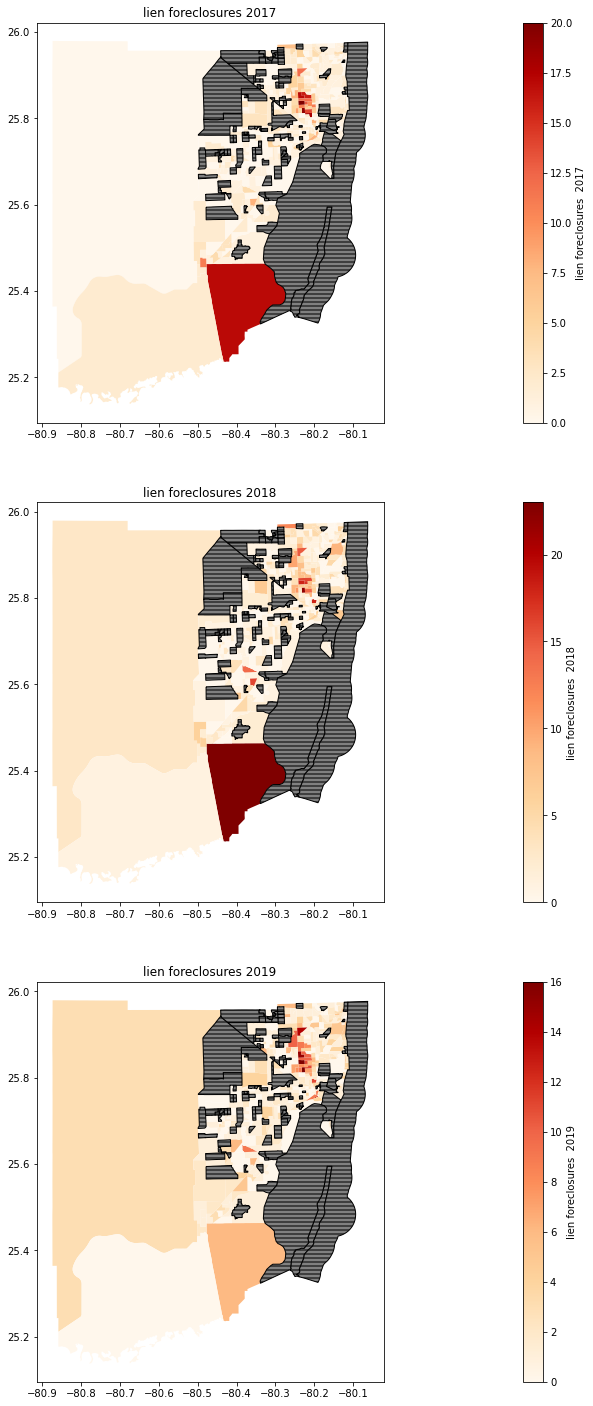

In [35]:
# multi year
column_suffix ="lien-foreclosures-"

year=2017

plt.figure(figsize=(50,25))
ax1=plt.subplot(311)
florida_final.plot(column_suffix+str(year), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year)},
                  ax=ax1,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year));


ax2=plt.subplot(312)
florida_final.plot(column_suffix+str(year+1), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+1)},
                  ax=ax2,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+1));


ax3=plt.subplot(313)
florida_final.plot(column_suffix+str(year+2), figsize=(15,10), legend =True,cmap=plt.cm.OrRd,
                  legend_kwds={"label":column_suffix.replace("-"," ") + " "+str(year+2)},
                  ax=ax3,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column_suffix.replace("-"," ")+str(year+2));


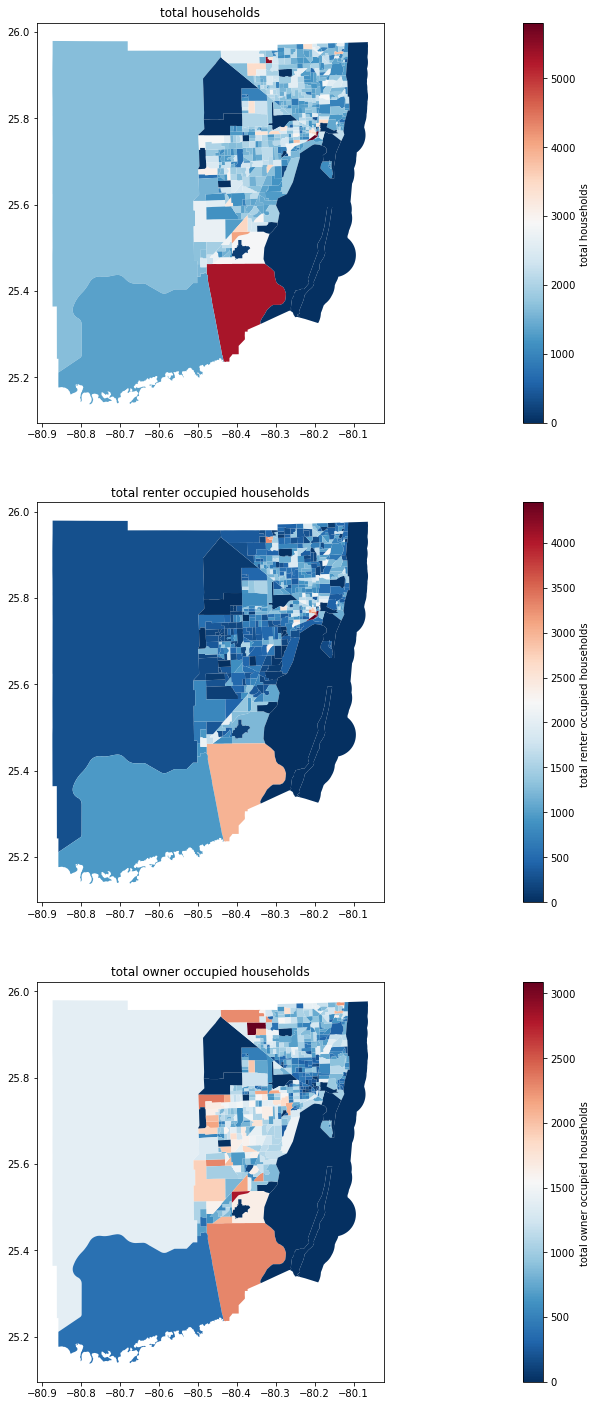

In [36]:
# total-households  total-renter-occupied-households    total-owner-occupied-households

plt.figure(figsize=(50,25))
ax1=plt.subplot(311)
column ="total-households"
florida_final.plot(column, figsize=(15,10), legend =True,cmap=plt.cm.RdBu_r,
                  legend_kwds={"label":column.replace("-"," ") + " "},
                  ax=ax1,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column.replace("-"," "));
          
ax2=plt.subplot(312)
column ="total-renter-occupied-households"
florida_final.plot(column, figsize=(15,10), legend =True,cmap=plt.cm.RdBu_r,
                  legend_kwds={"label":column.replace("-"," ") + " "},
                  ax=ax2,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column.replace("-"," "));
          
ax3=plt.subplot(313)
column ="total-owner-occupied-households"
florida_final.plot(column, figsize=(15,10), legend =True,cmap=plt.cm.RdBu_r,
                  legend_kwds={"label":column.replace("-"," ") + " "},
                  ax=ax3,
                   missing_kwds ={
                       "color":"grey",
                       "edgecolor":"black",
                       "hatch":"---",
                       "label":"Missing Values"
                   })

plt.title(column.replace("-"," "));